**Assignment-1 ML Data Cleaning and Feature Selection**

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

**Abstract**

This dataset provides information on the cost and duration of guided hunts for fifteen different North American large mammal species, allowing for exploration of costly signaling theory

Species: The name of the species of mammal being hunted. (Text)

Province/State: The province or state in which the hunt took place. (Text)

Price: The total cost of the hunt. (Numerical)

Number of days: The number of days the hunt lasted. (Numerical)

Day price: The cost per day of the hunt. (Numerical)

S Rank: The rarity of the species being hunted. (Numerical)

Status: The conservation status of the species being hunted. (Text)

Classification: The classification of the species being hunted (carnivore, omnivore, or herbivore). (Text)

Avg Mass: The average mass of the species being hunted. (Numerical)

SCI: The Safari Club International score of the species being hunted. (Numerical)

Latitude: The latitude of the location where the hunt took place. (Numerical)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
data = pd.read_csv(
    "C:\\Users\\subha\\OneDrive\\Desktop\\Python_Ass1\\Mihalikdata.csv"
)
data.head()

,Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
0,Mountain Lion,Alberta,15930,10.0,1593,S4,4.0,Carnivore,60.4,Y,54.5000
1,Mountain Lion,Alberta,9500,10.0,950,S4,4.0,Carnivore,60.4,Y,54.5000
2,Mountain Lion,Alberta,10000,10.0,1000,S4,4.0,Carnivore,60.4,Y,54.5000
3,Mountain Lion,Alberta,12500,10.0,1250,S4,4.0,Carnivore,60.4,Y,54.5000
4,Mountain Lion,Arizona,5000,5.0,1000,S4,4.0,Carnivore,60.4,Y,34.1661


In [3]:
data.dtypes.value_counts()

object     5
float64    4
int64      2
Name: count, dtype: int64

1. What are the data types? (Only numeric and categorical)

  We have 3 data types for the given data. 5 columns: (Species, Province/State, S Rank, Classification, SCI) have categorical data type. 4 columns: (Number of days, Status, Avg Mass, Latitude) have numerical (float) data type. 2 colomns: (Price, Day price) have numerical (int) data type.

In [4]:
# checking if the any data is missing
data.isnull().sum()

Species            0
Province/State     0
Price              0
Number of days     0
Day price          0
S Rank            47
Status            47
Classification     0
Avg Mass           0
SCI                0
Latitude           0
dtype: int64

2. Are there missing values?

  Columns 'S Rank' and 'Status' have missing values. Values are missing for 47 records in these two columns.

In [5]:
# Impute missing values in 'S Rank' with the mode (most frequent rank)
data['S Rank'].fillna(data['S Rank'].mode().iloc[0], inplace=True)
data['Status'].fillna(data['Status'].mode().iloc[0], inplace=True)

Imputing the missing values in 'S Rank' and 'Status' with mode

In [6]:
data.isnull().sum()

Species           0
Province/State    0
Price             0
Number of days    0
Day price         0
S Rank            0
Status            0
Classification    0
Avg Mass          0
SCI               0
Latitude          0
dtype: int64

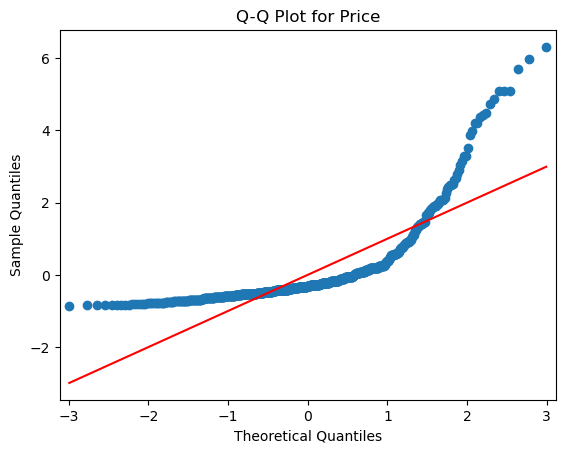

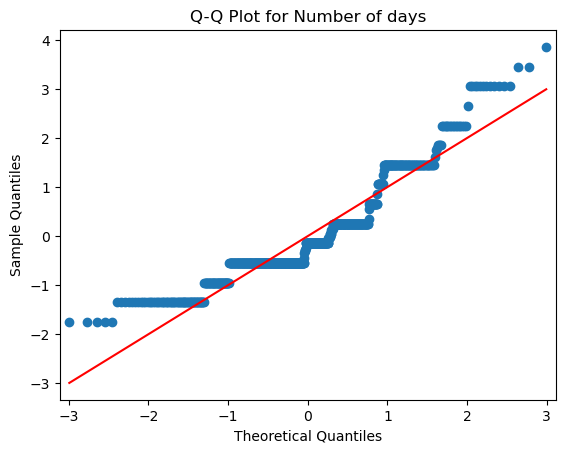

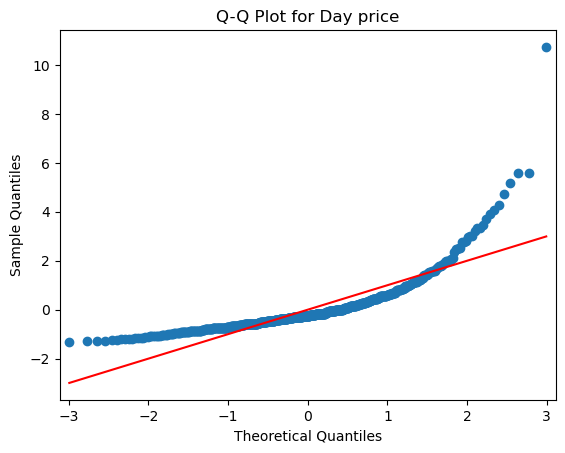

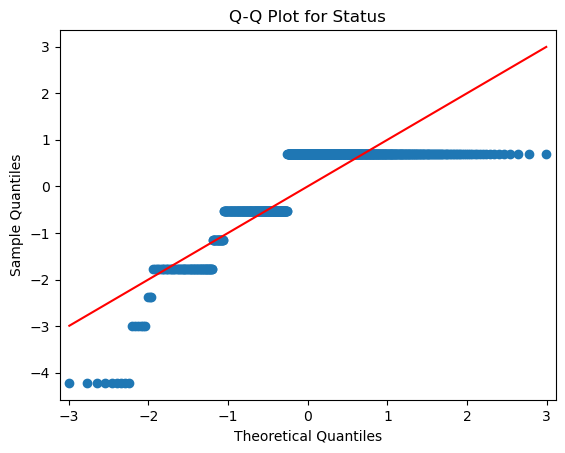

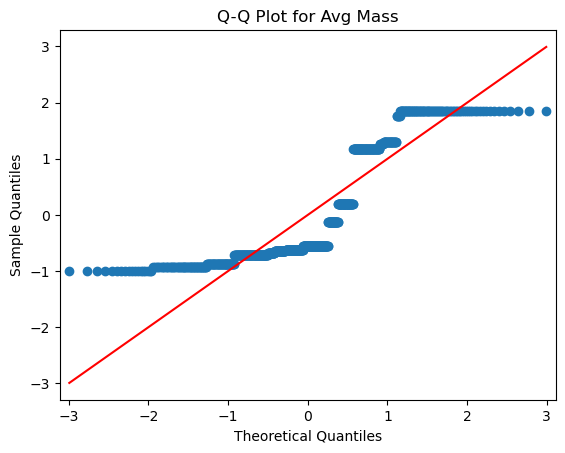

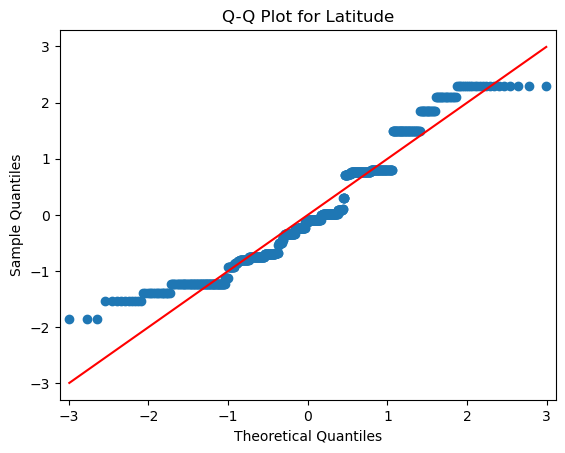

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your dataset is stored in a variable named 'data'

# Select columns with numerical data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create Q-Q plots for both 'Price' and other numerical columns
for column in numerical_columns:
    # Extract the column data
    column_data = data[column]

    # Create a Q-Q plot
    sm.qqplot(column_data, line='s', fit=True, dist=stats.norm, marker='o')
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

3. What are the likely distributions of the numeric variables?¶

  From the QQ plot above -

  Price: The plot suggests that the distribution of 'Price' deviates from the normal distribution, especially at higher values.

  Number of Days: This distribution also shows deviation from normality, with a skew towards lower values.

  Day Price: Similar to 'Price', 'Day Price' shows deviation from a normal distribution, particularly at higher values.

  Status: The distribution of 'Status' shows significant deviation from normality, indicating a categorical or discrete nature rather than continuous.
  
  Avg Mass: This variable also does not follow a normal distribution, with more concentration in the lower range and a long tail towards higher values.

  Latitude: The distribution of 'Latitude' seems to show some deviation from normality but is closer to a normal distribution than the others.

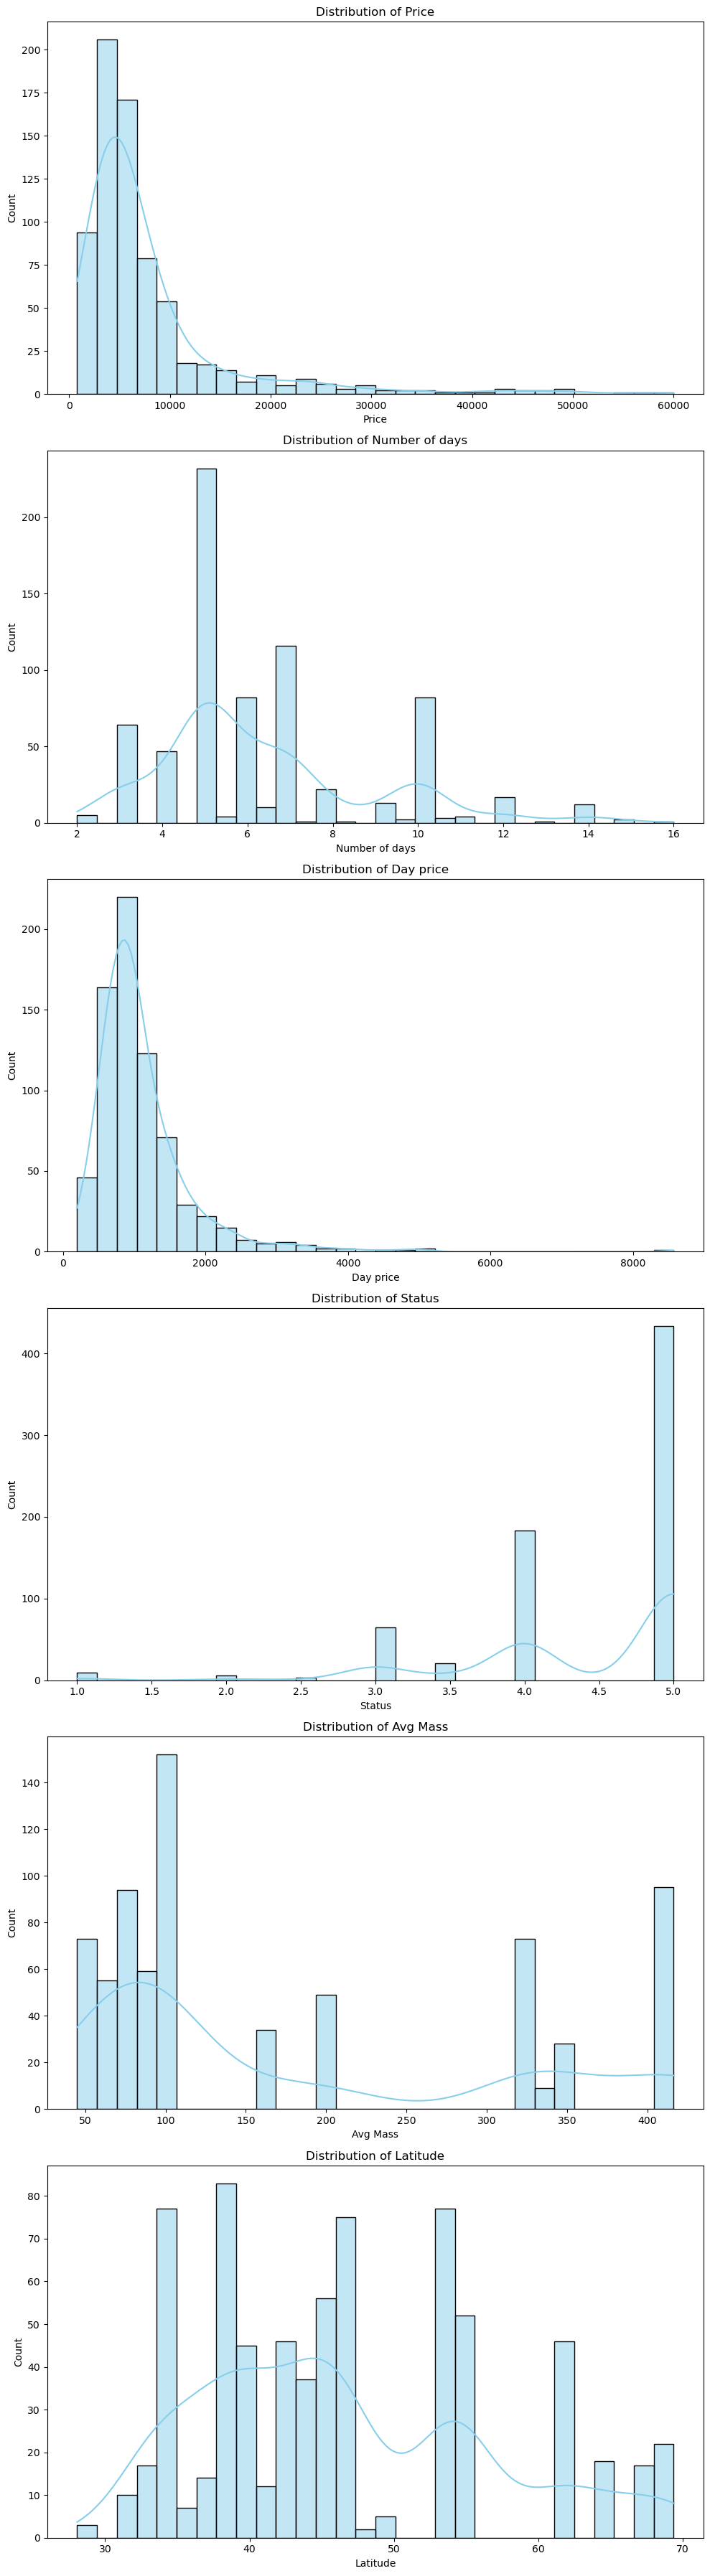

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable named 'data'

# Select columns with numerical data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], ax=axes[i], kde=True, color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<Axes: >

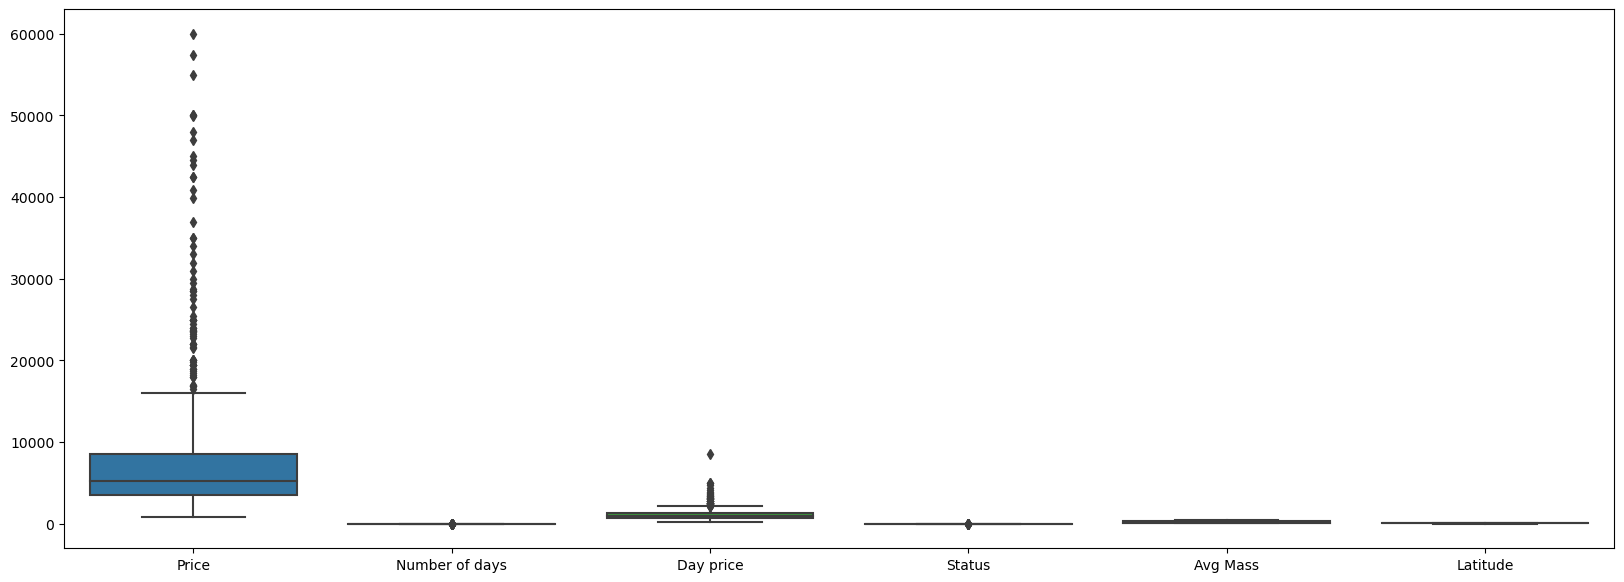

In [9]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

As it is hard to visualize and read the data, Normalizing the data to have a better understanding and visualization

In [10]:
data = pd.get_dummies(data)


from sklearn.preprocessing import MinMaxScaler

# Identify numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Create x to store scaled values as floats
x = data[numeric_features].values.astype(float)

# Preparing for normalizing
min_max_scaler = MinMaxScaler()

# Transform the data to fit min-max processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[numeric_features] = pd.DataFrame(x_scaled, columns=numeric_features)


In [11]:
# data after nromalizing and feature creation
data.head()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S2S3,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y
0,0.255574,0.571429,0.166408,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,0.146959,0.571429,0.089595,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
2,0.155405,0.571429,0.095568,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
3,0.197635,0.571429,0.125433,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,0.070946,0.214286,0.095568,0.75,0.041481,0.147818,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [12]:
data.corr()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S2S3,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y
Price,1.000000,0.748216,0.903317,-0.312873,0.135996,0.554739,0.270663,-0.145102,0.264650,0.073062,...,-0.010930,0.328525,0.001203,0.174636,-0.350940,0.117779,0.054640,-0.054640,-0.414003,0.414003
Number of days,0.748216,1.000000,0.480256,-0.309670,0.233253,0.601676,0.276286,-0.157908,0.347782,0.103172,...,0.024904,0.279460,0.102226,0.158675,-0.345681,0.083982,0.099964,-0.099964,-0.559141,0.559141
Day price,0.903317,0.480256,1.000000,-0.295568,0.105199,0.472469,0.221732,-0.162562,0.194063,0.112616,...,-0.019767,0.314953,-0.022499,0.152668,-0.318303,0.092444,0.010787,-0.010787,-0.325810,0.325810
Status,-0.312873,-0.309670,-0.295568,1.000000,0.100875,-0.094355,-0.477305,0.058131,-0.209165,-0.067109,...,-0.153704,-0.555279,-0.199220,-0.312818,0.847657,0.025764,-0.209469,0.209469,0.391814,-0.391814
Avg Mass,0.135996,0.233253,0.105199,0.100875,1.000000,0.274990,-0.189905,0.051118,0.259828,-0.026185,...,0.119524,0.020320,0.006731,-0.165619,0.143732,-0.025474,-0.035299,0.035299,-0.236681,0.236681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S Rank_S5,0.117779,0.083982,0.092444,0.025764,-0.025474,0.068649,-0.011431,-0.010063,-0.007491,-0.008291,...,-0.002409,-0.011731,-0.006455,-0.021735,-0.045696,1.000000,-0.019583,0.019583,-0.035010,0.035010
Classification_Carnivore,0.054640,0.099964,0.010787,-0.209469,-0.035299,0.079075,-0.161173,0.513896,0.382538,-0.116896,...,-0.033965,0.163902,-0.070982,0.289509,-0.307316,-0.019583,1.000000,-1.000000,-0.162885,0.162885
Classification_Ungulate,-0.054640,-0.099964,-0.010787,0.209469,0.035299,-0.079075,0.161173,-0.513896,-0.382538,0.116896,...,0.033965,-0.163902,0.070982,-0.289509,0.307316,0.019583,-1.000000,1.000000,0.162885,-0.162885
SCI_N,-0.414003,-0.559141,-0.325810,0.391814,-0.236681,-0.391149,-0.288146,0.287445,-0.188830,-0.208987,...,-0.060724,-0.237482,-0.113128,-0.196634,0.397295,-0.035010,-0.162885,0.162885,1.000000,-1.000000


In [13]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Select top k features based on mutual information (regression)
k_best = SelectKBest(score_func=mutual_info_regression, k='all')
k_best.fit(X_encoded, y)

# Display scores of features
print("Mutual Information Scores of Features:\n", pd.Series(k_best.scores_, index=X.columns).sort_values(ascending=False))


Mutual Information Scores of Features:
 Day price                        0.625043
Number of days                   0.433744
Latitude                         0.232268
SCI_N                            0.222643
SCI_Y                            0.221142
                                   ...   
Province/State_North Carolina    0.000000
Province/State_North Dakota      0.000000
Province/State_Ontario           0.000000
Province/State_Oklahoma          0.000000
Province/State_Iowa              0.000000
Length: 78, dtype: float64


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Use Linear Regression as the estimator for RFE
estimator = LinearRegression()

# Number of features to select (adjust as needed)
n_features_to_select = min(10, X.shape[1])

# Create RFE model
rfe = RFE(estimator, n_features_to_select=n_features_to_select)

# Fit RFE on the encoded feature set and target variable
rfe.fit(X_encoded, y)

# Display ranking of features
print("RFE Ranking of Features:\n", pd.Series(rfe.ranking_, index=X.columns).sort_values())


RFE Ranking of Features:
 Species_Thinhorn Sheep      1
Classification_Ungulate     1
Province/State_Alberta      1
Species_Bighorn Sheep       1
Species_Black Bear          1
                           ..
Species_Pronghorn          65
SCI_Y                      66
Number of days             67
SCI_N                      68
Day price                  69
Length: 78, dtype: int32


In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Use Lasso Regression as the base model for feature selection
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed

# Create SelectFromModel model
sfm = SelectFromModel(lasso_model)

# Fit SelectFromModel on the encoded feature set and target variable
sfm.fit(X_encoded, y)

# Display selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features using Lasso Regression:\n", selected_features)


Selected Features using Lasso Regression:
 Index(['Number of days', 'Day price', 'Avg Mass', 'Latitude'], dtype='object')


In [16]:
# Assuming your dataset is stored in a variable named 'data'
correlation_with_price = data.corr()['Price'].abs().sort_values(ascending=False)

# Display features with high absolute correlation with 'Price'
important_features = correlation_with_price[1:13]  # Exclude the target variable
print("Important Features:\n", important_features)


Important Features:
 Day price                          0.903317
Number of days                     0.748216
Latitude                           0.554739
Species_Thinhorn Sheep             0.415525
SCI_N                              0.414003
SCI_Y                              0.414003
Species_Polar Bear                 0.358269
S Rank_S5                          0.350940
S Rank_S3                          0.328525
Province/State_British Columbia    0.315216
Status                             0.312873
Province/State_Yukon               0.286140
Name: Price, dtype: float64


Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

feature selection -

Price: target variable.

Day Price: Strongly correlated with 'Price', as shown in multiple analyses. It's likely a key predictor.

Number of Days: Also consistently identified as a significant predictor for 'Price'.

Latitude: Showed importance in several analyses, indicating a geographical influence on 'Price'.

Species-Specific Features ('Species_Thinhorn Sheep', 'Species_Polar Bear'): These could capture species-specific pricing patterns, which may not be evident in other variables.

SCI Variables ('SCI_N', 'SCI_Y'): If these represent certain conditions or classifications, their inclusion could capture essential aspects influencing 'Price'.

S Rank ('S Rank_S5'): This might reflect a categorization or quality ranking that influences pricing.

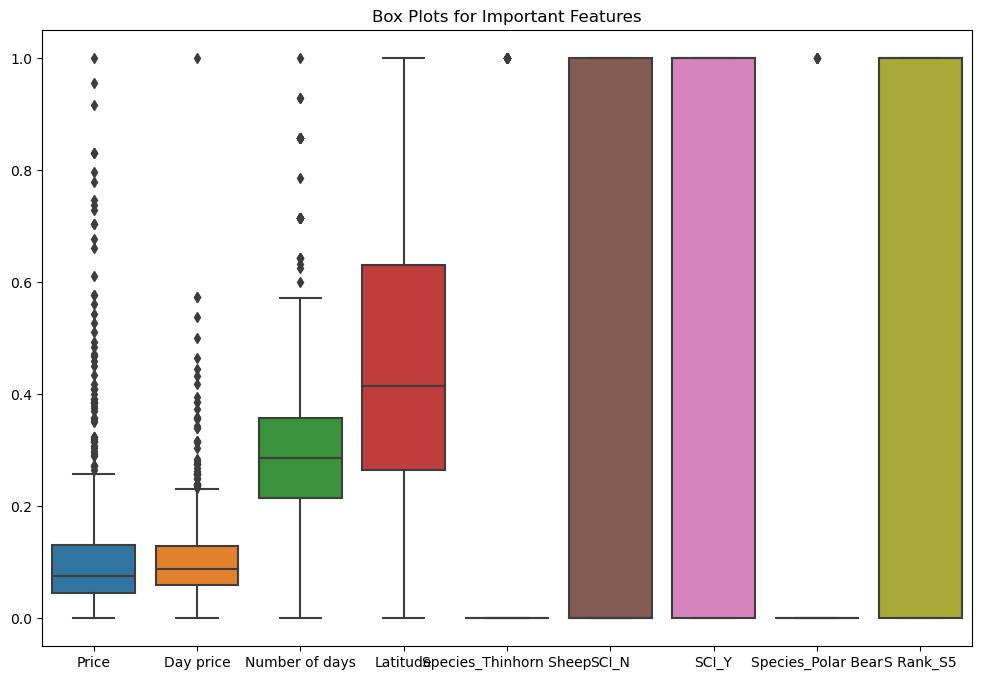

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original dataset
# Replace 'important_features' with the actual variable name you used
important_features = ['Price', 'Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'SCI_N', 'SCI_Y', 'Species_Polar Bear', 'S Rank_S5']

# Select only the important features from the dataset
data = data[important_features]

# Create a box plot for all important features
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.title('Box Plots for Important Features')
plt.show()


Price (Blue Box Plot):

Large range of values.

Many outliers indicate some very high prices.

Median price is below the halfway point, suggesting lower prices are more common.

Day Price (Orange Box Plot):

Also a large range, but with fewer outliers compared to the overall price.

The median is lower, which implies day prices are generally lower than the overall trip prices.

Number of Days (Green Box Plot):

Tighter range, indicating less variation in the number of days.

Few outliers, meaning most trips are of a similar duration.

Median is closer to the first quartile, suggesting shorter trips are more common.

Latitude (Red Box Plot):

Substantial variability in latitude.

Outliers are present, indicating some locations are much further north.

Median is around the midpoint, suggesting a spread of locations from north to south.

<Axes: >

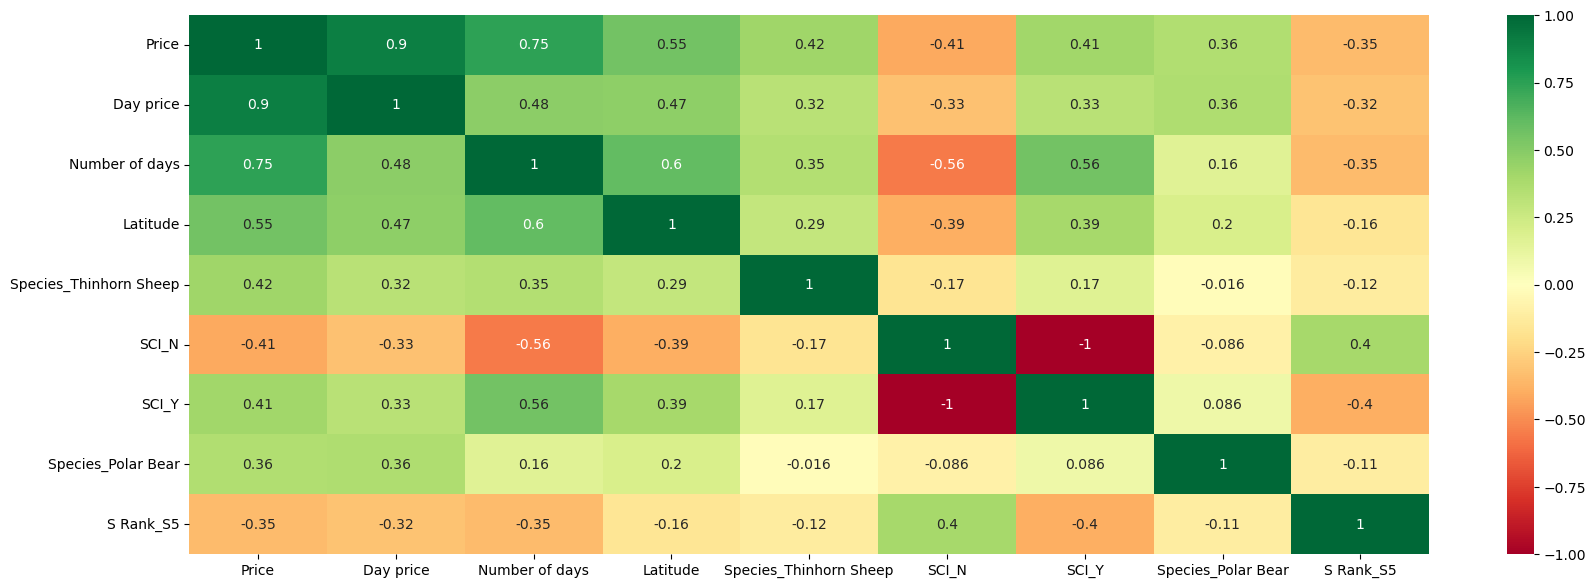

In [18]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

From the heatmap, 'Day price' and 'Number of days' emerge as features with the strongest correlation to 'Price', suggesting they are good predictors. The moderate correlation of 'Latitude' and 'Species_Thinhorn Sheep' with 'Price' also indicates their relevance. However, the strong negative correlation between 'SCI_N' and 'SCI_Y' implies that including both may be redundant in a model. It is also important to be cautious of potential multicollinearity between 'Day price' and 'Number of days', as it might affect the model's performance.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\subha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


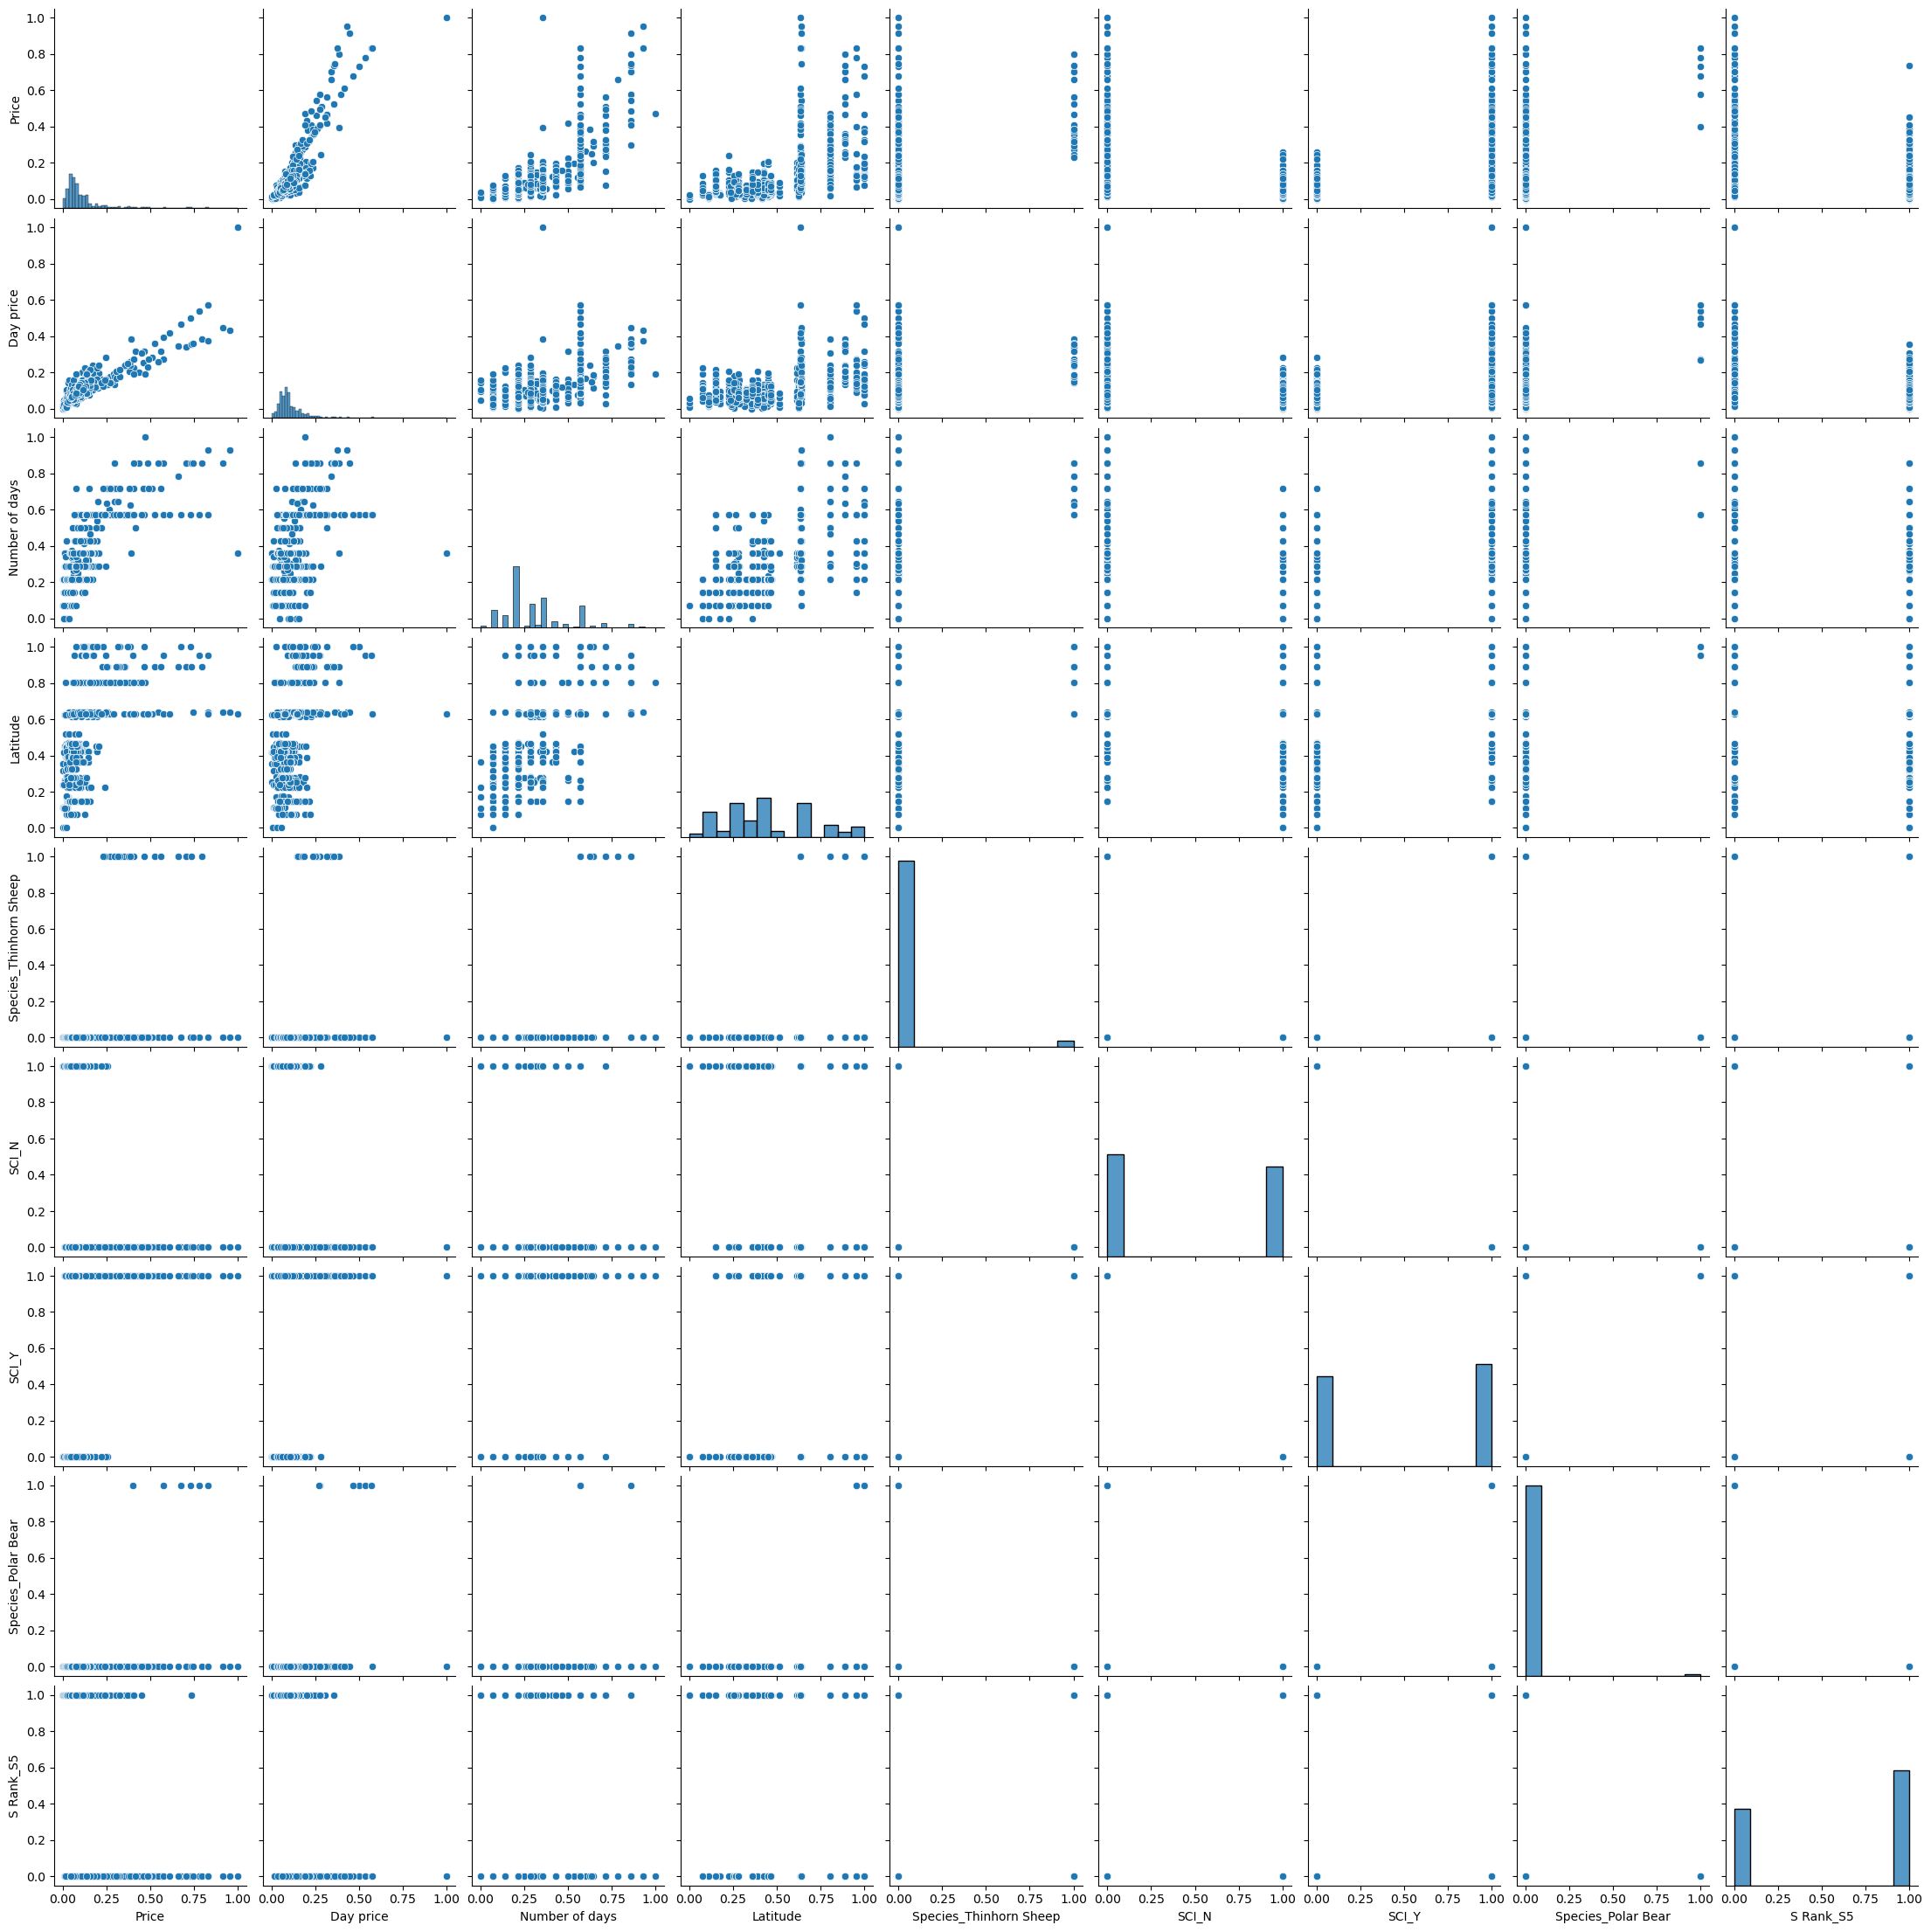

In [19]:
sns.pairplot(data)

From this pairplot, it appears that 'Day price' and 'Number of days' have strong, possibly linear relationships with 'Price'. Categorical variables show different levels of 'Price' for different categories, which could be useful for predictive modeling. It's also evident that there may be outliers or extreme values in the dataset, particularly for 'Price', which could influence model performance if not handled appropriately.

'SCI_N' and 'SCI_Y' are perfectly negatively correlated with each other (-1), which is expected since they are likely binary indicators and exact opposites of each other. Including both in a regression model would be redundant and could inflate the variance of the coefficient estimates due to multicollinearity. Selecting only one of them is efficient.

'Day price' and 'Number of days' show a moderate positive correlation (0.48), which could indicate some degree of multicollinearity. However, a correlation of 0.48 is not typically high enough to be concerning by itself. It's worth noting that multicollinearity is more of a concern when correlation coefficients are above 0.7 or 0.8.

In [20]:
import statsmodels.api as sm

# Convert boolean columns to numeric (0 and 1)
data["Species_Thinhorn Sheep"] = data["Species_Thinhorn Sheep"].astype(int)
data["SCI_N"] = data["SCI_N"].astype(int)
data["SCI_Y"] = data["SCI_Y"].astype(int)
data["Species_Polar Bear"] = data["Species_Polar Bear"].astype(int)
data["S Rank_S5"] = data["S Rank_S5"].astype(int)

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "SCI_N",
            "Species_Polar Bear",
            "S Rank_S5",
            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              1765.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:25:59   Log-Likelihood:                          1245.7
No. Observations:                 721   AIC:                                     -2477.
Df Residuals:                     714   BIC:                                     -2445.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Strong Model Fit: An R-squared value of 0.945 indicates that the model explains a very high proportion of the variance in the target variable, 'Price'.

Statistical Significance: The F-statistic is large and its associated probability is near zero, signifying that the model is statistically significant overall.

Influential Variables:

'Day price' has a strong positive impact on 'Price'.

'Number of days' also positively influences 'Price'.

'Latitude' is negatively associated with 'Price', indicating geographical influence.

'Species_Thinhorn Sheep' and 'Species_Polar Bear' are positively associated with 'Price'.

'SCI_N' and 'S Rank_S5' have negative associations with 'Price'.

Potential Issues:

A low Durbin-Watson statistic suggests possible positive autocorrelation in the residuals. Tests indicate that residuals are not normally distributed, which is a deviation from OLS assumptions and could affect the reliability of hypothesis tests.

Model Assumptions: The lack of an intercept may suggest that the model assumes 'Price' starts at zero when all predictors are zero, which may not be appropriate depending on the context.

Residual Concerns: The non-normal distribution of residuals suggests that the model may not be capturing all the patterns in the data, possibly due to outliers or missing variables.

In [21]:
from sklearn.model_selection import train_test_split

X = data[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "SCI_N",
            "Species_Polar Bear",
            "S Rank_S5",
    ]
]

y = data["Price"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)


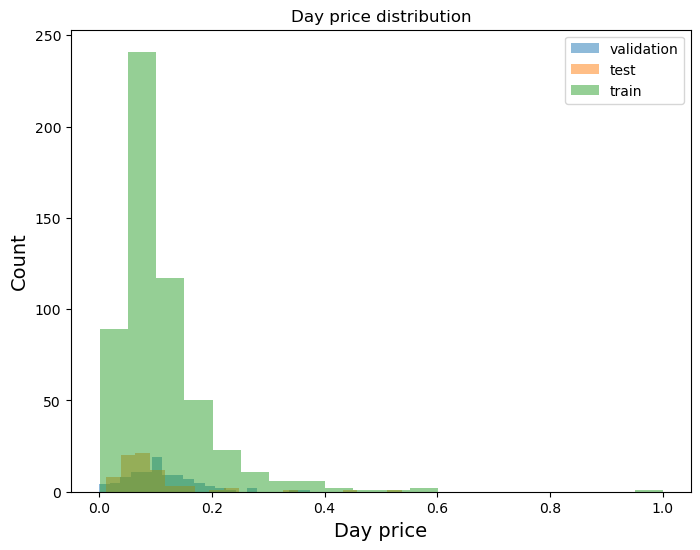

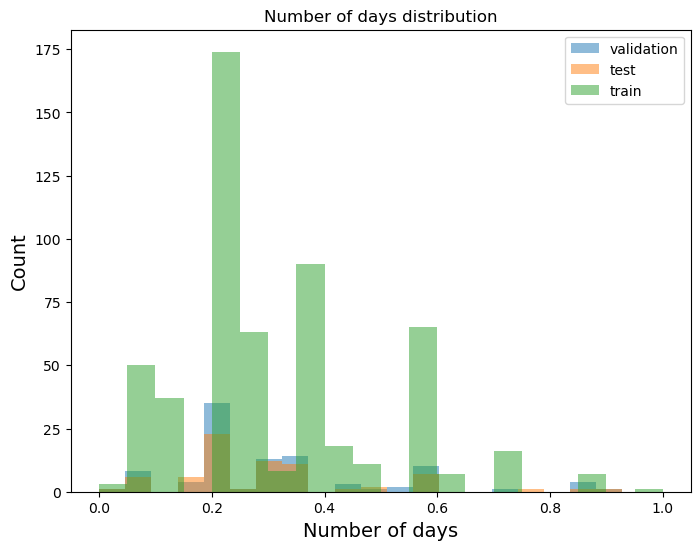

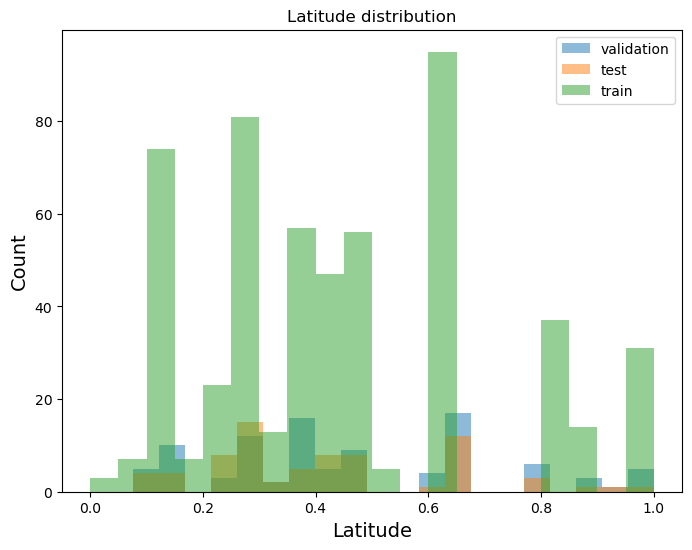

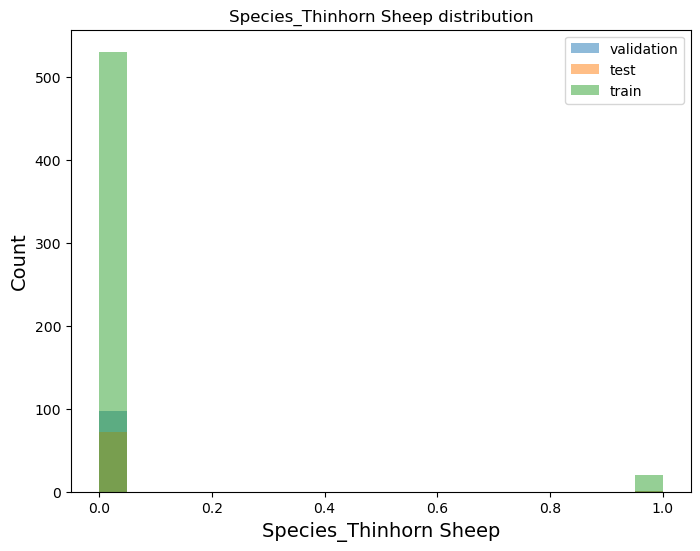

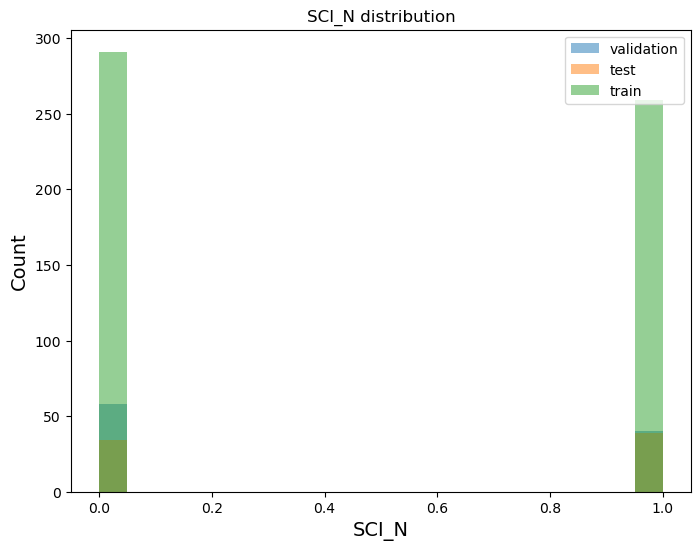

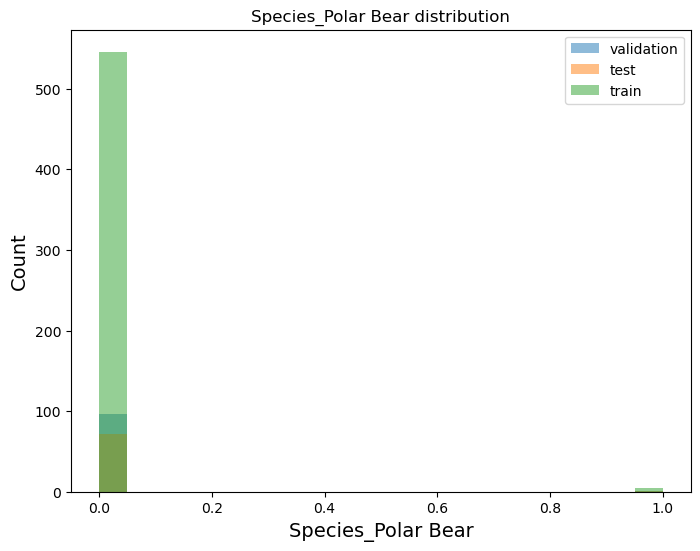

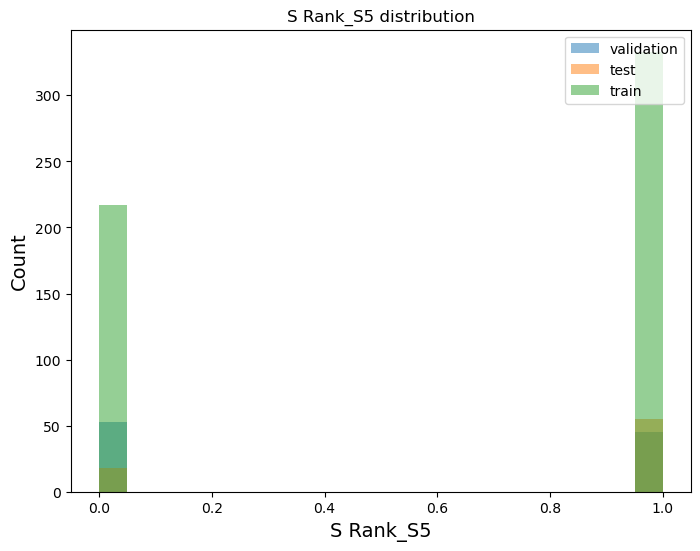

In [22]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "SCI_N",
            "Species_Polar Bear",
            "S Rank_S5",
    ]
]

X_val_plot = X_val[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "SCI_N",
            "Species_Polar Bear",
            "S Rank_S5",
    ]
]

X_train_plot = X_train[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "SCI_N",
            "Species_Polar Bear",
            "S Rank_S5",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.00
Coefficient of determination: 0.96
R^2 score on tarining set = 0.9568220515876132


In [25]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.00
Coefficient of determination: 0.94
R^2 score on test set = 0.9398442202624475


In [26]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.00
Coefficient of determination: 0.94
R^2 score on validation set = 0.9389288234429621


12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
import random

# Define the percentages of data to be removed
percentages = [0.01, 0.05, 0.1]

# Create a function to calculate the percentage error
def calculate_percentage_error(original, imputed):
    return np.abs((original - imputed) / original) * 100

# Loop over the defined percentages
for percentage in percentages:
    # Remove the percentage of data from the dataset randomly
    data_missing = data.copy()
    ix = [(row, col) for row in range(data_missing.shape[0]) for col in range(data_missing.shape[1])]
    for row, col in random.sample(ix, int(round(percentage * len(ix)))):
        data_missing.iat[row, col] = np.nan

    # Impute the missing values using different methods
    # Method 1: Mean/Median Imputation
    imputer = SimpleImputer(strategy='mean') # or 'median'
    data_mean_imputed = imputer.fit_transform(data_missing)

    # Method 2: KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_knn_imputed = knn_imputer.fit_transform(data_missing)

    # Method 3: MICE Imputation
    mice_imputer = IterativeImputer()
    data_mice_imputed = mice_imputer.fit_transform(data_missing)

    # Evaluate the imputation quality
    for original, imputed, method in zip([data]*3,
                                         [data_mean_imputed, data_knn_imputed, data_mice_imputed],
                                         ['Mean/Median', 'KNN', 'MICE']):
        mse = mean_squared_error(original, imputed)
        percentage_error = calculate_percentage_error(original, imputed)
        bias = np.mean(percentage_error)
        variance = np.var(percentage_error)

        print(f"Imputation method: {method}")
        print(f"Percentage of data removed: {percentage*100}%")
        print(f"Mean Squared Error: {mse}")
        print(f"Bias: {bias}")
        print(f"Variance: {variance}")
        print("\n")


Imputation method: Mean/Median
Percentage of data removed: 1.0%
Mean Squared Error: 0.0010695355326399798
Bias: inf
Variance: Price                      26.368038
Day price                  93.304434
Number of days             13.930144
Latitude                  470.775435
Species_Thinhorn Sheep           NaN
SCI_N                            NaN
SCI_Y                            NaN
Species_Polar Bear               NaN
S Rank_S5                        NaN
dtype: float64


Imputation method: KNN
Percentage of data removed: 1.0%
Mean Squared Error: 0.0003082217958207019
Bias: inf
Variance: Price                      4.326274
Day price                  8.364279
Number of days             2.547846
Latitude                  94.067346
Species_Thinhorn Sheep          NaN
SCI_N                      0.000000
SCI_Y                      0.000000
Species_Polar Bear         0.000000
S Rank_S5                       NaN
dtype: float64


Imputation method: MICE
Percentage of data removed: 1.0%
Mean Squ

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputation method: Mean/Median
Percentage of data removed: 5.0%
Mean Squared Error: 0.004790273194009017
Bias: inf
Variance: Price                     9241.708581
Day price                 6972.155948
Number of days             555.356082
Latitude                   205.705342
Species_Thinhorn Sheep            NaN
SCI_N                             NaN
SCI_Y                             NaN
Species_Polar Bear                NaN
S Rank_S5                         NaN
dtype: float64


Imputation method: KNN
Percentage of data removed: 5.0%
Mean Squared Error: 0.0013679470915967263
Bias: inf
Variance: Price                     200.338796
Day price                 295.053140
Number of days            198.413038
Latitude                  133.380033
Species_Thinhorn Sheep           NaN
SCI_N                            NaN
SCI_Y                            NaN
Species_Polar Bear               NaN
S Rank_S5                        NaN
dtype: float64


Imputation method: MICE
Percentage of data remov

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Mean Squared Error: MSE increases as more data is removed. The KNN imputation method consistently yields the lowest MSE, suggesting it is the most accurate among the methods tested.

Bias and Variance: The calculation of bias might be incorrect due to division by zero. The variance in imputed values increases with more missing data and varies across features.

Imputation Method Comparison: KNN and MICE outperform mean/median imputation, with KNN slightly edging out in terms of MSE.

NaN in Variance: NaN values indicate that for some features, the variance could not be computed, likely because no variation existed between original and imputed values.

Modeling Implications: KNN and MICE are preferable for handling missing data. The accuracy of bias needs further investigation, and zero values in the data may require a different error metric. It's important to ensure the imputation does not significantly alter the data's underlying distribution.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# For this example, we assume the dataset is already loaded into `df` and 'Price' is the target variable
df = data.copy()

# Identify outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data without outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Splitting the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

X_no_outliers = df_no_outliers.drop('Price', axis=1)
y_no_outliers = df_no_outliers['Price']

# Split both datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model with outliers
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)

# Train the model without outliers
model.fit(X_train_no, y_train_no)
y_pred_no = model.predict(X_test_no)
mse_without_outliers = mean_squared_error(y_test_no, y_pred_no)

# Compare the performance
print(f'MSE with outliers: {mse_with_outliers}')
print(f'MSE without outliers: {mse_without_outliers}')


MSE with outliers: 0.0007367029248162865
MSE without outliers: 0.00010980357963336651


11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

  A lower MSE means that the model with the outliers removed has a better fit to the data points. This suggests that outliers had a significant effect on the model, potentially skewing the results or causing the model to overfit to these extreme values.

Answer for the questions -

5.  Which independent variables have missing data? How much?

    No independent variables have any missing data or zeros.

6. Do the training and test sets have the same data?

    Yes, most of the data are same in test, train and validation data set.

7. In the predictor variables independent of all the other predictor variables?

    No, They are not independent of each other as seen from the correlation table and pairplot graph.

8. Which predictor variables are the most important?

    Day price

    Number of days

    Latitude

    Species_Thinhorn Sheep

    SCI_N

    Species_Polar Bear

    S Rank_S5
9. Do the ranges of the predictor variables make sense?

    Number of Days:

    Range: 2 to 16 days

    This range is reasonable for the duration of hunting trips, which can be short weekend outings or extend to multiple weeks.

    Day Price:

    Range: $200 to $8,571 per day

    This range is quite wide, suggesting a significant variation in daily rates, which is plausible as day rates can be influenced by various factors, including the type of trip, location, and amenities offered.

    Avg Mass:

    Range: 45 to 416.25 kg

    This is a wide range of average masses, which makes sense if the dataset includes a variety of species from small to large animals.

    Latitude:

    Range: 28.06 to 69.38

    This range covers a broad swath of the Northern Hemisphere, which is sensible for a dataset that may include hunting trip locations across North America.

10. What are the distributions of the predictor variables?   

    Number of Days: This distribution also shows deviation from normality, with a skew towards lower values.

    Day Price: Similar to 'Price', 'Day Price' shows deviation from a normal distribution, particularly at higher values.

    Status: The distribution of 'Status' shows significant deviation from normality, indicating a categorical or discrete nature rather than continuous.

    Avg Mass: This variable also does not follow a normal distribution, with more concentration in the lower range and a long tail towards higher values.

    Latitude: The distribution of 'Latitude' seems to show some deviation from normality but is closer to a normal distribution than the others.

**References**

  Sckit learn offcial documentation

Refered Towards Data Science


Eli5 official documentation

Aiskunks. (2023). "ML Data Cleaning and Feature Selection Abalone." A Crash Course in Statistical Learning. Accessed [2023 february14]. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb.

OpenAI's ChatGPT (personal communication, January 21, 2024) suggested the algorithms and code structure.

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). Feature importance reference is taken from eli5 offical documnetation. Linear regression and general code referred from Jupyter notebook 'ML Data Cleaning and Feature Selection Abalone' by Aiskunks (2023)."

MIT License

Copyright (c) 2024 vineethreddy2000

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.